In [1]:
import numpy as np 
import torch 
from glob import glob 
import os
from natsort import natsorted
import cv2
import matplotlib.pyplot as plt

import importlib
import datasets.Kitti
import datasets.pointodyssey
import datasets.sceneflow
import datasets.vkitti
import datasets.sintel
import datasets.dynamicreplica
import datasets.utils
import datasets.visualisation_utils




Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [22]:
scene_idx = 4
sample_idx = 100
sample_scene_imgs = np.arange(0, 100, 20)

# KITTI

### No Extrinsics yet. Only for validation for Harman comparison

In [26]:
importlib.reload(datasets.utils)
importlib.reload(datasets.Kitti)

import datasets.utils
from datasets.Kitti import KITTI

dataset_Kitti = KITTI(verbose=True, is_val=False,)

print('Number of Scenes: ', len(dataset_Kitti))

Number of Scenes:  276


Images in scene  233

image
Resolution:  torch.Size([233, 3, 375, 1242])
Min Value:  tensor(0.)
Max Value:  tensor(1.)
dtype:  torch.float32

depth
Resolution:  torch.Size([233, 375, 1242])
Min Value:  tensor(0.)
Max Value:  tensor(84.5664)
dtype:  torch.float32

Camera Intrinsics:
tensor([[721.5377,   0.0000, 609.5593],
        [  0.0000, 721.5377, 172.8540],
        [  0.0000,   0.0000,   1.0000]], dtype=torch.float64)
torch.Size([233, 3, 3])

Camera Extrinsics


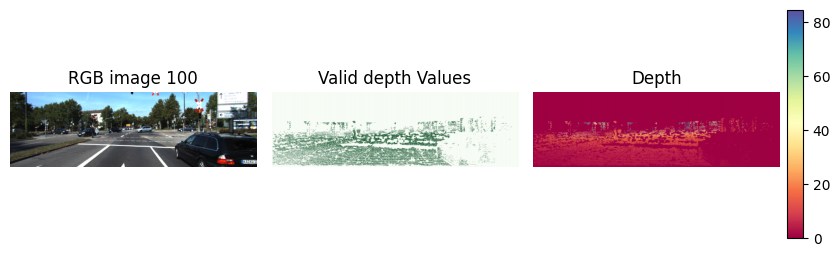

In [27]:
sample = dataset_Kitti[scene_idx]

importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.plot_scene_image(sample, sample_idx)

In [24]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.generate_gif(sample['image'], 'tmp_gifs/Kitti.gif')

In [29]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_image_to_3d(sample, sample_idx, 'tmp_3D_vis/Kitti.ply', max_depth=dataset_Kitti.max_depth,
                             Cam_to_World=dataset_Kitti.Cam_to_World,
                             Flip_to_open3d=dataset_Kitti.flip_to_open3d_coord,)

# Scene Flow
## Not working extrinsics jet: Driving, Flying Things, Monkaa
Es sieht so aus als würde die kamera in die flasche richtung punkte projeszieren. Ich weiss nicht genau wie das zu fixen ist. 

In [15]:
importlib.reload(datasets.utils)
importlib.reload(datasets.sceneflow)

import datasets.utils
from datasets.sceneflow import SceneFlow

dataset_SceneFlow = SceneFlow(verbose=True, use_Driving=False, use_flyThings=False, use_Monkaa=True)

print('Number of Scenes: ', len(dataset_SceneFlow))

Number of Scenes:  48


Images in scene  151

image
Resolution:  torch.Size([151, 3, 540, 960])
Min Value:  tensor(0.)
Max Value:  tensor(0.9961)
dtype:  torch.float32

depth
Resolution:  torch.Size([151, 540, 960])
Min Value:  tensor(4.0269)
Max Value:  tensor(661.6314)
dtype:  torch.float32

Camera Intrinsics:
tensor([[1.0500e+03, 0.0000e+00, 4.7950e+02],
        [0.0000e+00, 1.0500e+03, 2.6950e+02],
        [0.0000e+00, 0.0000e+00, 1.0000e+00]])
torch.Size([151, 3, 3])

Camera Extrinsics
tensor([[-9.9959e-01, -8.7649e-03,  2.7140e-02,  1.2286e+01],
        [ 2.8520e-02, -3.0720e-01,  9.5122e-01, -2.5979e+00],
        [ 2.5817e-08,  9.5160e-01,  3.0733e-01,  6.5091e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])
torch.Size([151, 4, 4])



/export/data/ffeiden/git_hub_repos/Video-Depth-Anything/datasets/visualisation_utils.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


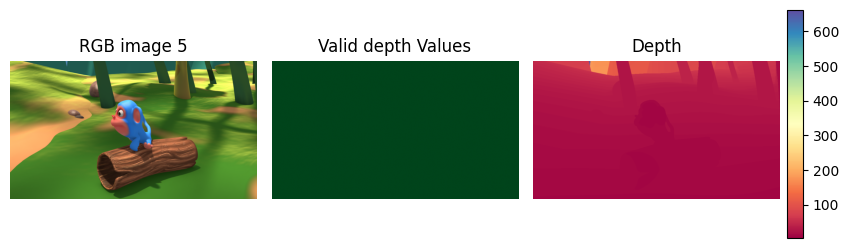

In [16]:
sample = dataset_SceneFlow[scene_idx]

importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.plot_scene_image(sample, sample_idx)

In [15]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.generate_gif(sample['image'], 'tmp_gifs/SceneFlow.gif')

In [17]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_image_to_3d(sample, sample_idx, 'tmp_3D_vis/SceneFlow.ply', max_depth=dataset_SceneFlow.max_depth,
                             Cam_to_World=dataset_SceneFlow.Cam_to_World,
                             Flip_to_open3d=dataset_SceneFlow.flip_to_open3d_coord,)

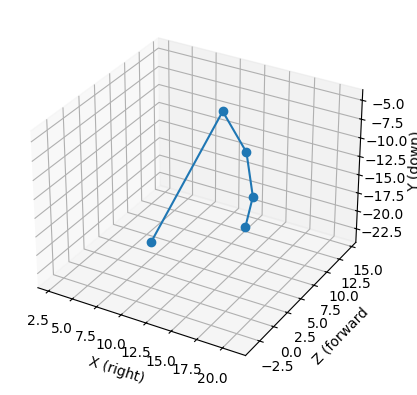

Camera looks towards (world coordinates): [12.31312745 -1.64668232  6.81643343]


In [18]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_scene_to_3d(sample, sample_scene_imgs, 'tmp_3D_vis/SceneFlow_scene.ply', max_depth=dataset_SceneFlow.max_depth,
                             Cam_to_World=dataset_SceneFlow.Cam_to_World,
                             Flip_to_open3d=dataset_SceneFlow.flip_to_open3d_coord,
                             Visualise_cam_pos=True)

R =  sample['extrinsics'][sample_idx].numpy()[:3, :3]
t =  sample['extrinsics'][sample_idx].numpy()[:3, 3]
z_axis = R @ np.array([0, 0, 1])  # Forward direction in camera space
print("Camera looks towards (world coordinates):", z_axis + t)

# Dynamic_Replica
## NOT FINISHED JET EXTRINSICS ARE WRONG

In [20]:
importlib.reload(datasets.utils)
importlib.reload(datasets.dynamicreplica)

import datasets.utils
from datasets.dynamicreplica import DynamicReplica

dataset_DynamicReplica = DynamicReplica(verbose=True)

print('Number of Scenes: ', len(dataset_DynamicReplica))



Number of Scenes:  966


Images in scene  300

image
Resolution:  torch.Size([300, 3, 720, 1280])
Min Value:  tensor(0.)
Max Value:  tensor(1.)
dtype:  torch.float32

depth
Resolution:  torch.Size([300, 720, 1280])
Min Value:  tensor(-0.)
Max Value:  tensor(10.7188)
dtype:  torch.float32

Camera Intrinsics:
tensor([[700.,   0., 640.],
        [  0., 700., 360.],
        [  0.,   0.,   1.]])
torch.Size([300, 3, 3])

Camera Extrinsics
tensor([[-7.9594e-01, -1.7851e-01, -5.7846e-01, -3.5458e+00],
        [-7.2497e-09,  9.5554e-01, -2.9487e-01,  1.2298e+00],
        [ 6.0537e-01, -2.3470e-01, -7.6055e-01,  8.9003e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])
torch.Size([300, 4, 4])



/export/data/ffeiden/git_hub_repos/Video-Depth-Anything/datasets/visualisation_utils.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


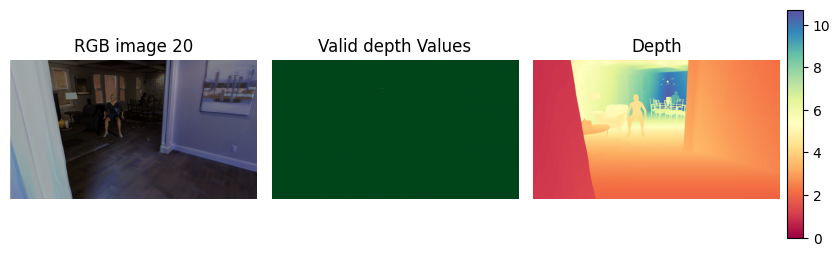

In [21]:
sample = dataset_DynamicReplica[scene_idx]
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.plot_scene_image(sample, sample_idx)

    

In [24]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_image_to_3d(sample, sample_idx, 'tmp_3D_vis/DynamicReplica.ply', max_depth=dataset_DynamicReplica.max_depth,
                             Cam_to_World=dataset_DynamicReplica.Cam_to_World,
                             Flip_to_open3d=dataset_DynamicReplica.flip_to_open3d_coord,)

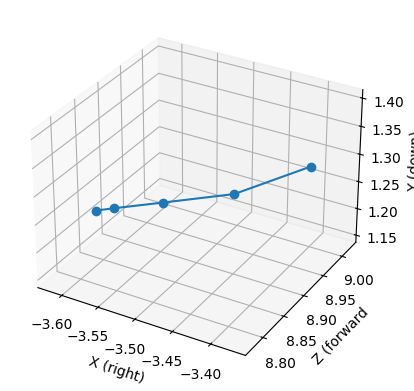

In [ ]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_scene_to_3d(sample, sample_scene_imgs, 'tmp_3D_vis/DynamicReplica_Scene.ply', max_depth=dataset_DynamicReplica.max_depth,
                             Cam_to_World=dataset_DynamicReplica.Cam_to_World,
                             Flip_to_open3d=dataset_DynamicReplica.flip_to_open3d_coord,
                             Visualise_cam_pos=True)

# Sintel

In [3]:
importlib.reload(datasets.utils)
importlib.reload(datasets.sintel)

import datasets.utils
from datasets.sintel import Sintel

dataset_Sintel = Sintel(verbose=True)

print('Number of Scenes: ', len(dataset_Sintel))

Number of Scenes:  23


Images in scene  50

image
Resolution:  torch.Size([50, 3, 436, 1024])
Min Value:  tensor(0.)
Max Value:  tensor(1.)
dtype:  torch.float32

depth
Resolution:  torch.Size([50, 436, 1024])
Min Value:  tensor(0.2422)
Max Value:  tensor(32.7180)
dtype:  torch.float32

Camera Intrinsics:
tensor([[640.0000,   0.0000, 511.5000],
        [  0.0000, 640.0000, 217.5000],
        [  0.0000,   0.0000,   1.0000]])
torch.Size([50, 3, 3])

Camera Extrinsics
tensor([[ 4.7069e-01,  8.8230e-01,  1.2567e-08, -3.1879e+00],
        [-7.8521e-02,  4.1890e-02, -9.9603e-01,  1.2059e+00],
        [-8.7880e-01,  4.6883e-01,  8.8996e-02,  3.2548e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])
torch.Size([50, 4, 4])



/export/data/ffeiden/git_hub_repos/Video-Depth-Anything/datasets/visualisation_utils.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


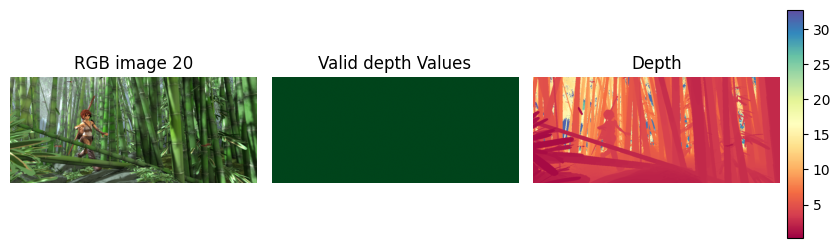

In [4]:
sample = dataset_Sintel[scene_idx]

importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.plot_scene_image(sample, sample_idx)

In [5]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_image_to_3d(sample, sample_idx, 'tmp_3D_vis/Sintel.ply', max_depth=dataset_Sintel.max_depth,
                             Cam_to_World=dataset_Sintel.Cam_to_World,
                             Flip_to_open3d=dataset_Sintel.flip_to_open3d_coord,)

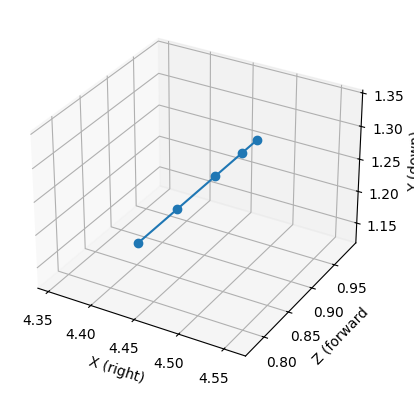

In [6]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_scene_to_3d(sample, sample_scene_imgs, 'tmp_3D_vis/Sintel_scene.ply', max_depth=dataset_Sintel.max_depth,
                             Cam_to_World=dataset_Sintel.Cam_to_World,
                             Flip_to_open3d=dataset_Sintel.flip_to_open3d_coord,
                             Visualise_cam_pos=True)

# VKITTI

In [15]:
importlib.reload(datasets.utils)
importlib.reload(datasets.vkitti)

import datasets.utils
from datasets.vkitti import VKITTI

dataset_VKITTI = VKITTI(verbose=True)

print('Number of Scenes: ', len(dataset_VKITTI))

Number of Scenes:  100


Images in scene  447

image
Resolution:  torch.Size([447, 3, 375, 1242])
Min Value:  tensor(0.)
Max Value:  tensor(1.)
dtype:  torch.float32

depth
Resolution:  torch.Size([447, 375, 1242])
Min Value:  tensor(1.8100)
Max Value:  tensor(655.3500)
dtype:  torch.float32

Camera Intrinsics:
tensor([[725.0087,   0.0000, 620.5000],
        [  0.0000, 725.0087, 187.0000],
        [  0.0000,   0.0000,   1.0000]], dtype=torch.float64)
torch.Size([447, 3, 3])

Camera Extrinsics
tensor([[-2.6379e-01,  6.9086e-02, -9.6210e-01,  7.1635e+00],
        [ 1.3087e-02,  9.9760e-01,  6.8046e-02,  1.1255e+02],
        [ 9.6449e-01,  5.3590e-03, -2.6406e-01, -2.2401e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
torch.Size([447, 4, 4])



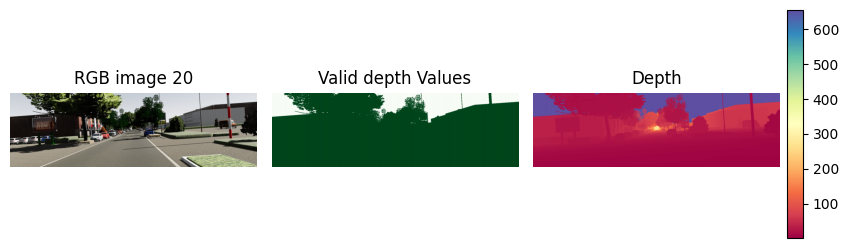

In [16]:
sample = dataset_VKITTI[scene_idx]

importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.plot_scene_image(sample, sample_idx)

In [17]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_image_to_3d(sample, sample_idx, 'tmp_3D_vis/VKITTI.ply', max_depth=dataset_VKITTI.max_depth,
                             Cam_to_World=dataset_VKITTI.Cam_to_World,
                             Flip_to_open3d=dataset_VKITTI.flip_to_open3d_coord,)

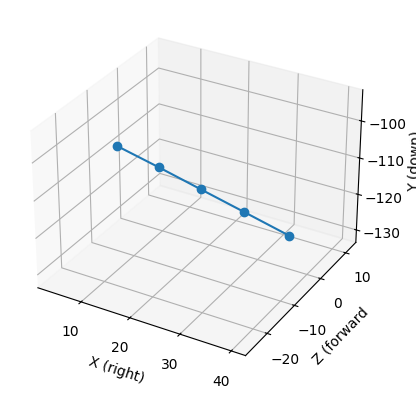

In [18]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_scene_to_3d(sample, sample_scene_imgs, 'tmp_3D_vis/VKITTI_scene.ply', max_depth=dataset_VKITTI.max_depth,
                             Cam_to_World=dataset_VKITTI.Cam_to_World,
                             Flip_to_open3d=dataset_VKITTI.flip_to_open3d_coord,
                             Visualise_cam_pos=True)

# Pointodyssey 

## Not Sure about Camera Extrinsics (Intinsics seem to work)

In [19]:
importlib.reload(datasets.utils)
importlib.reload(datasets.pointodyssey)

import datasets.utils
from datasets.pointodyssey import PointOdyssey

dataset_pointodyssey = PointOdyssey(verbose=True)

print('Number of Scenes: ', len(dataset_pointodyssey))

Number of Scenes:  131


Images in scene  1669

image
Resolution:  torch.Size([1669, 3, 540, 960])
Min Value:  tensor(0.)
Max Value:  tensor(0.8392)
dtype:  torch.float32

depth
Resolution:  torch.Size([1669, 540, 960])
Min Value:  tensor(0.)
Max Value:  tensor(59.8917)
dtype:  torch.float32

Camera Intrinsics:
tensor([[576.,   0., 480.],
        [  0., 576., 270.],
        [  0.,   0.,   1.]])
torch.Size([1669, 3, 3])

Camera Extrinsics
tensor([[-0.7256,  0.0000,  0.6880, -0.0054],
        [-0.0897, -0.9917, -0.0945,  0.4154],
        [ 0.6821, -0.1302,  0.7192,  3.9844],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])
torch.Size([1669, 4, 4])



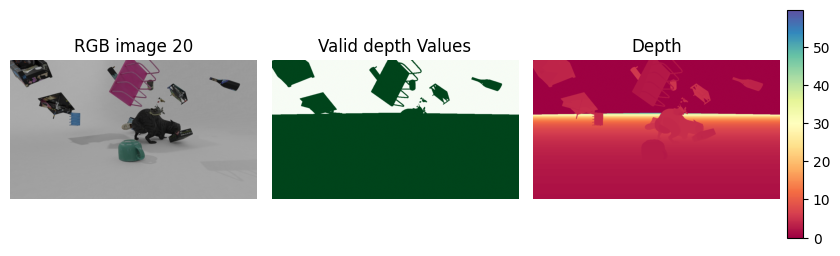

In [20]:
sample = dataset_pointodyssey[scene_idx]

importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.plot_scene_image(sample, sample_idx)

In [21]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_image_to_3d(sample, sample_idx, 'tmp_3D_vis/pointodyssey.ply', 
                             max_depth=dataset_pointodyssey.max_depth,
                             Cam_to_World=dataset_pointodyssey.Cam_to_World,
                             Flip_to_open3d=dataset_pointodyssey.flip_to_open3d_coord,)

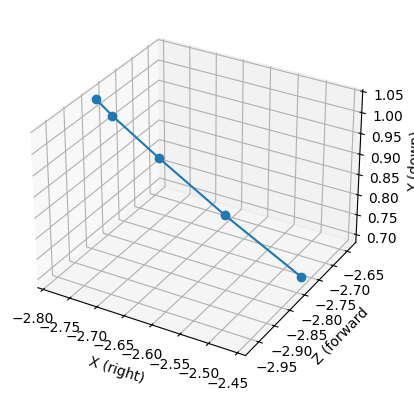

In [22]:
importlib.reload(datasets.visualisation_utils)
import datasets.visualisation_utils as vis_util

vis_util.project_scene_to_3d(sample, sample_scene_imgs, 'tmp_3D_vis/pointodyssey_scene.ply', 
                             max_depth=dataset_pointodyssey.max_depth,
                             Cam_to_World=dataset_pointodyssey.Cam_to_World,
                             Flip_to_open3d=dataset_pointodyssey.flip_to_open3d_coord,
                             Visualise_cam_pos=True)